In [1]:
#loading libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset

retail_dataset = pd.read_csv(r"C:\Users\BJ\Desktop\Dataset\Csv\uci_online_re.csv")
df = retail_dataset.copy()

In [3]:
#data cleaning

df.drop_duplicates(inplace=True)
df.dropna(subset=['Customer ID'], inplace=True)
df.reset_index(inplace=True, drop=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   Price        401604 non-null  float64       
 6   Customer ID  401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [5]:
df["Sale"] = df["Quantity"] * df["Price"]

In [6]:
#getting Maxsnapshot

snapshot = df['InvoiceDate'].max()

snapshot = snapshot + pd.Timedelta(days=1)
snapshot

Timestamp('2011-12-10 00:00:00')

In [7]:
#getting new customer and filtering

df['FirstPurchase'] = df.groupby('Customer ID')['InvoiceDate'].transform('min')

In [8]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,FirstPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
401599,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-08-18
401600,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-08-18
401601,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-08-18
401602,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,2011-08-18


In [9]:
#new customers
new_customers = df[df['FirstPurchase'] >= snapshot - pd.Timedelta(days=30)]
new_customers['Segment'] = "New"
new_customers

C:\Users\BJ\AppData\Local\Temp\ipykernel_632\303489957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customers['Segment'] = "New"


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,FirstPurchase,Segment
337578,575494,22826,LOVE SEAT ANTIQUE WHITE METAL,3,2011-11-10,85.00,17500.0,United Kingdom,255.00,2011-11-10,New
337579,575494,23468,TUSCAN VILLA BIRD TABLE,2,2011-11-10,8.25,17500.0,United Kingdom,16.50,2011-11-10,New
337580,575494,23466,TUSCAN VILLA DOVECOTE BIRD FEEDER,2,2011-11-10,8.25,17500.0,United Kingdom,16.50,2011-11-10,New
337711,575507,22109,FULL ENGLISH BREAKFAST PLATE,8,2011-11-10,3.75,17197.0,United Kingdom,30.00,2011-11-10,New
337712,575507,22624,IVORY KITCHEN SCALES,8,2011-11-10,8.50,17197.0,United Kingdom,68.00,2011-11-10,New
...,...,...,...,...,...,...,...,...,...,...,...
401495,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09,1.25,12713.0,Germany,15.00,2011-12-09,New
401496,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,12713.0,Germany,10.20,2011-12-09,New
401497,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09,0.85,12713.0,Germany,10.20,2011-12-09,New
401498,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09,2.08,12713.0,Germany,24.96,2011-12-09,New


In [10]:
#old customers
old_customers = df[df['FirstPurchase'] <= snapshot - pd.Timedelta(days=30)]

customer_RFM = df.groupby('Customer ID').agg({
                                                "InvoiceDate": lambda x:(snapshot - x.max()).days,
                                                "Invoice": 'count',
                                                "Sale": 'sum'
})

In [ ]:
#renaming columns
customer_RFM.columns = ["Recency", "Frequency", "Monetary"]
customer_RFM

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


<Axes: >

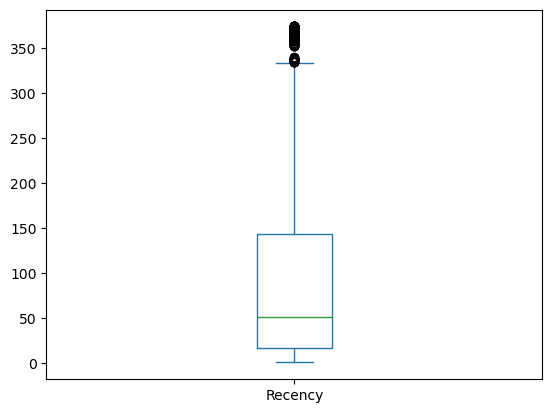

In [ ]:
#showing Recency distribution 
customer_RFM["Recency"].plot(kind='box')

<Axes: >

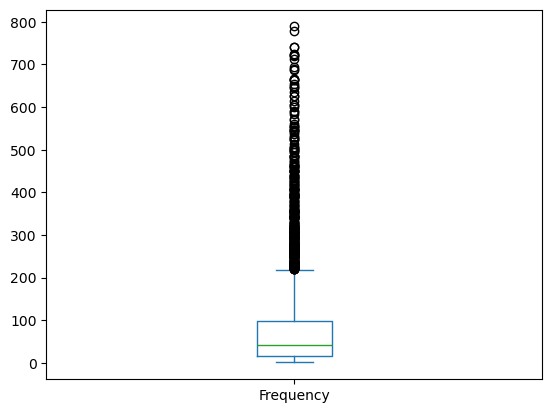

In [ ]:
#showing and filtering "frequency" distribution (no analythical changes apply)
dd = customer_RFM[customer_RFM["Frequency"] <= 800]
dd["Frequency"].plot(kind='box')

In [ ]:
#Creating quantile
quantile = customer_RFM.quantile(q=[0.25, 0.50, 0.75])
quantile

,Recency,Frequency,Monetary
0.25,17.0,17.00,291.795
0.50,51.0,41.00,644.070
0.75,144.0,99.25,1608.335


In [13]:
def RscoreF(x, quantile):
    if x <=quantile["Recency"][0.25]:
        return 4
    elif x <=quantile["Recency"][0.50]:
        return 3
    elif x <=quantile["Recency"][0.75]:
        return 2
    else:
        return 1

In [14]:
def FscoreF(x, quantile):
    if x <=quantile["Frequency"][0.25]:
        return 1
    elif x <=quantile["Frequency"][0.50]:
        return 2
    elif x <=quantile["Frequency"][0.75]:
        return 3
    else:
        return 4

In [15]:
def MscoreF(x, quantile):
    if x <=quantile["Monetary"][0.25]:
        return 1
    elif x <=quantile["Monetary"][0.50]:
        return 2
    elif x <=quantile["Monetary"][0.75]:
        return 3
    else:
        return 4

In [16]:
customer_RFM["Rscore"] = customer_RFM["Recency"].apply(lambda x:RscoreF(x, quantile))
customer_RFM["Fscore"] = customer_RFM["Frequency"].apply(lambda x:FscoreF(x, quantile))
customer_RFM["Mscore"] = customer_RFM["Monetary"].apply(lambda x:MscoreF(x, quantile))
customer_RFM["Sum Score"] = customer_RFM["Rscore"] + customer_RFM["Fscore"] + customer_RFM["Mscore"]
customer_RFM["RFM Code"] = customer_RFM["Rscore"].astype('str') + customer_RFM["Fscore"].astype('str') + customer_RFM["Mscore"].astype('str')
customer_RFM

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,Sum Score,RFM Code
Customer ID,,,,,,,,
12346.0,326,2,0.00,1,1,1,3,111
12347.0,3,182,4310.00,4,4,4,12,444
12348.0,76,31,1797.24,2,2,4,8,224
12349.0,19,73,1757.55,3,3,4,10,334
12350.0,311,17,334.40,1,1,2,4,112
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3,111
18281.0,181,7,80.82,1,1,1,3,111
18282.0,8,13,176.60,4,1,1,6,411


In [ ]:
#Segment Label
def labelF(x):
    if x <= 3:
        return 'Lost'
    elif x <= 6:
        return 'At Risk'
    elif x <= 8:
        return 'Moderate'
    elif x <= 10:
        return 'Loyal'
    else:
        return 'Champion'

In [ ]:
#Extracting "segment" column 
customer_RFM["Segment"] = customer_RFM["Sum Score"].apply(labelF)
rfm_old = customer_RFM["Segment"].reset_index()
rfm_old

,Customer ID,Segment
0,12346.0,Lost
1,12347.0,Champion
2,12348.0,Moderate
3,12349.0,Loyal
4,12350.0,At Risk
...,...,...
4367,18280.0,Lost
4368,18281.0,Lost
4369,18282.0,At Risk
4370,18283.0,Champion


In [20]:
new_customers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,FirstPurchase,Segment
337578,575494,22826,LOVE SEAT ANTIQUE WHITE METAL,3,2011-11-10,85.00,17500.0,United Kingdom,255.00,2011-11-10,New
337579,575494,23468,TUSCAN VILLA BIRD TABLE,2,2011-11-10,8.25,17500.0,United Kingdom,16.50,2011-11-10,New
337580,575494,23466,TUSCAN VILLA DOVECOTE BIRD FEEDER,2,2011-11-10,8.25,17500.0,United Kingdom,16.50,2011-11-10,New
337711,575507,22109,FULL ENGLISH BREAKFAST PLATE,8,2011-11-10,3.75,17197.0,United Kingdom,30.00,2011-11-10,New
337712,575507,22624,IVORY KITCHEN SCALES,8,2011-11-10,8.50,17197.0,United Kingdom,68.00,2011-11-10,New
...,...,...,...,...,...,...,...,...,...,...,...
401495,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09,1.25,12713.0,Germany,15.00,2011-12-09,New
401496,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,12713.0,Germany,10.20,2011-12-09,New
401497,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09,0.85,12713.0,Germany,10.20,2011-12-09,New
401498,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09,2.08,12713.0,Germany,24.96,2011-12-09,New


In [21]:
old_customers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,FirstPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
401599,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-08-18
401600,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-08-18
401601,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-08-18
401602,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,2011-08-18


In [ ]:
#left joining "segment" column to old customer table
old_customers = old_customers.merge(rfm_old, on="Customer ID", how='left')

In [28]:
old_customers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,FirstPurchase,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01,Loyal
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,Loyal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01,Loyal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,Loyal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,Loyal
...,...,...,...,...,...,...,...,...,...,...,...
393187,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-08-18,Loyal
393188,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-08-18,Loyal
393189,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-08-18,Loyal
393190,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,2011-08-18,Loyal


In [29]:
new_customers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sale,FirstPurchase,Segment
337578,575494,22826,LOVE SEAT ANTIQUE WHITE METAL,3,2011-11-10,85.00,17500.0,United Kingdom,255.00,2011-11-10,New
337579,575494,23468,TUSCAN VILLA BIRD TABLE,2,2011-11-10,8.25,17500.0,United Kingdom,16.50,2011-11-10,New
337580,575494,23466,TUSCAN VILLA DOVECOTE BIRD FEEDER,2,2011-11-10,8.25,17500.0,United Kingdom,16.50,2011-11-10,New
337711,575507,22109,FULL ENGLISH BREAKFAST PLATE,8,2011-11-10,3.75,17197.0,United Kingdom,30.00,2011-11-10,New
337712,575507,22624,IVORY KITCHEN SCALES,8,2011-11-10,8.50,17197.0,United Kingdom,68.00,2011-11-10,New
...,...,...,...,...,...,...,...,...,...,...,...
401495,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09,1.25,12713.0,Germany,15.00,2011-12-09,New
401496,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,12713.0,Germany,10.20,2011-12-09,New
401497,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09,0.85,12713.0,Germany,10.20,2011-12-09,New
401498,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09,2.08,12713.0,Germany,24.96,2011-12-09,New


In [ ]:
#appending old customers plus new
df_RFM = pd.concat([new_customers, old_customers], axis=0, ignore_index=True)

In [ ]:
#checking how customers are segmented
df_segment = df_RFM["Segment"].value_counts().reset_index()
df_segment

,Segment,count
0,Champion,242627
1,Loyal,78916
2,Moderate,40378
3,At Risk,28190
4,New,8867
5,Lost,3081


<Axes: xlabel='Segment'>

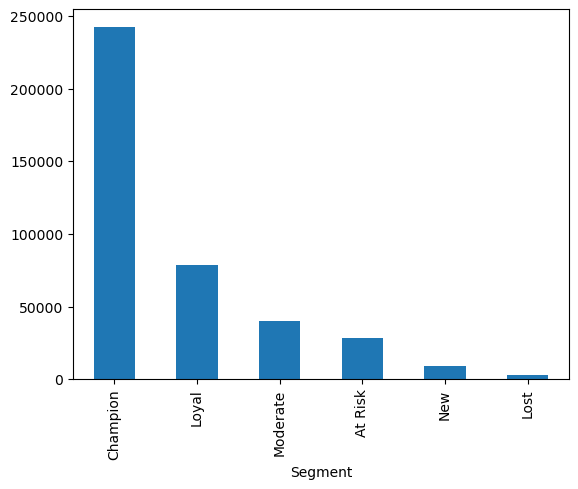

In [ ]:
#distribution of customers (bar chart)
df_RFM["Segment"].value_counts().plot(kind='bar')

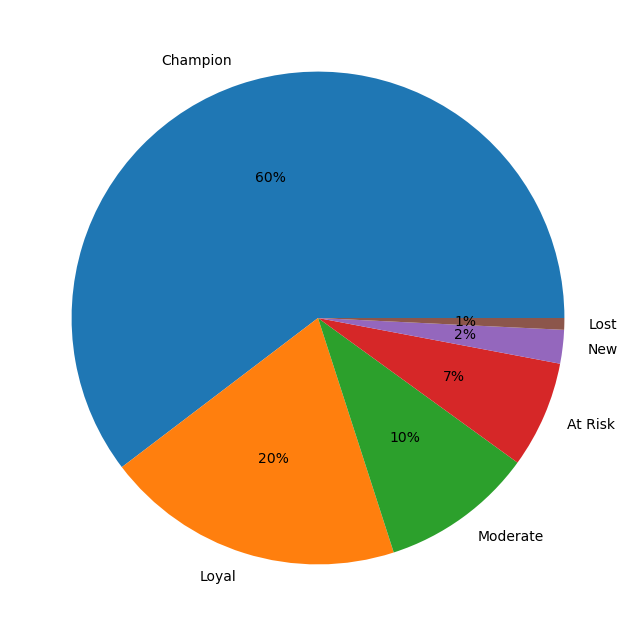

In [ ]:
#distribution of customers (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(df_segment["count"], labels=df_segment["Segment"], autopct='%1.0f%%')
plt.show()